2.606951871657754

5.126262626262627

3

2

w*(4*w**2 - 3)

array([0.71569379])

array([1.        , 1.25291297, 1.53489546, 0.71569379])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

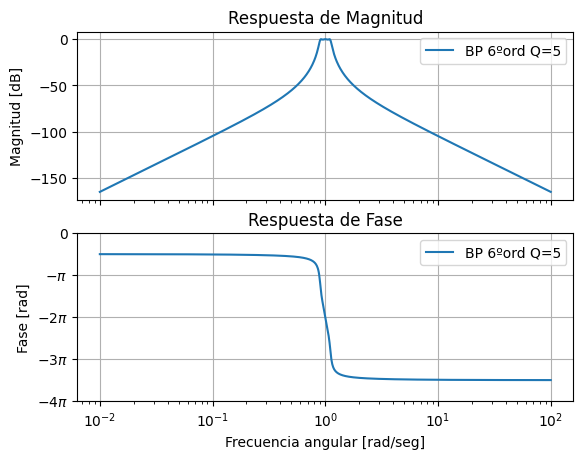

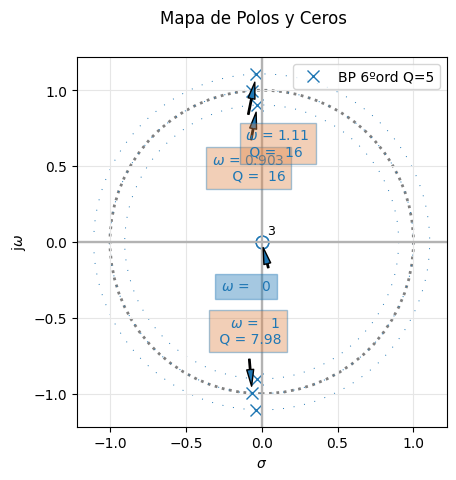

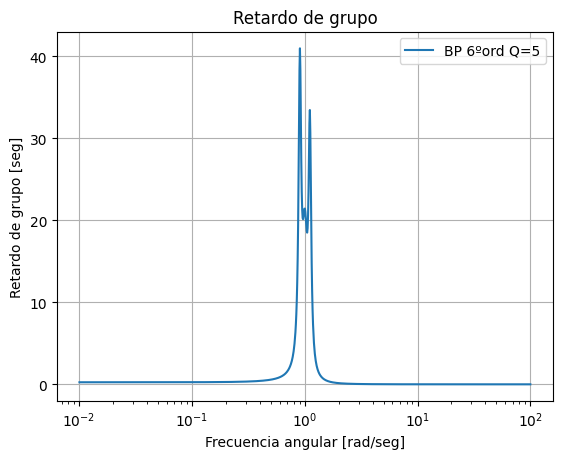

In [1]:
import numpy as np
import math
from scipy import signal as sig
from pytc2.general import Chebyshev_polynomials,s,w,print_subtitle
from pytc2.sistemas_lineales import analyze_sys,pretty_print_lti, tf2sos_analog,pretty_print_SOS

alfha_max=0.5
alfha_min_1=16
alfha_min_2=24

ws1=17000/22000
wp=1
ws2=36000/22000

Q=22000.0/(24200-19800)

ws_pb1= -(Q*( ws1**2 - 1))/ ws1
ws_pb2= (Q*( ws2**2 - 1))/ ws2
display(ws_pb1)
display(ws_pb2)

# Calculo de epsilon 

epsilon=np.sqrt((10**(alfha_max/10)-1))


alfha_aprox_1=0
alfha_aprox_2=0
n_1=1
n_2=1

while alfha_aprox_1 < alfha_min_1:
    alfha_aprox_1=10*np.log10(1+ epsilon**2 * (np.cosh(n_1 * (np.arccosh(ws_pb1))))**2)
    
    if alfha_aprox_1<alfha_min_1 :
        n_1 = n_1 + 1
    

while alfha_aprox_2<alfha_min_2 :
    alfha_aprox_2=10*np.log10(1+ epsilon**2 * (np.cosh(n_2 * (np.arccosh(ws_pb2))))**2)
    if alfha_aprox_2<alfha_min_1 :
        n_2=n_2 + 1

display(n_1)
display(n_2)
chebn_expr= Chebyshev_polynomials(n_1)
display(chebn_expr)

z,p,k=sig.cheb1ap(n_1,alfha_max)
num_cheb,den_cheb=sig.zpk2tf(z,p,k)

display(num_cheb)
display(den_cheb)

sos_cheb=tf2sos_analog(num_cheb,den_cheb)
pretty_print_SOS(sos_cheb,mode='omegayq')

num_pbanda, den_pbanda = sig.lp2bp(num_cheb, den_cheb, bw = 1/Q)
sos_band_pass=tf2sos_analog(num_pbanda,den_pbanda)
pretty_print_SOS(sos_band_pass,mode='omegayq')

T1_bp =  sig.TransferFunction( num_pbanda, den_pbanda )

# el caracter "_" descarta la salida de la función
_= analyze_sys([T1_bp], sys_name='BP 6ºord Q=5'.format(Q))



# Tarea Semanal 6 
## Nicolas Albano 

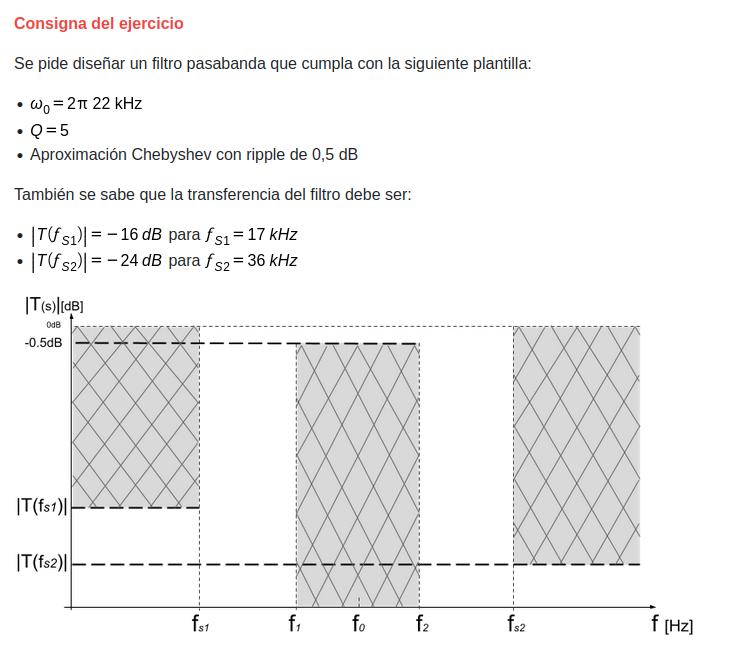

Las consignas de la actividad:

1. Obtener la plantilla de diseño pasabanda normalizada
2. Obtener la funcion transferencia normalizada del prototipo pasabajo que satisfaga el requerimiento del filtro pasabanda.
3. Obtener la transferecia pasabanda normalizada
4. Implementar mediante secciones pasivas separadas por seguidores de tension activos 
5. Activar las redes pasivas mediante la red propuesta aqui debajo y comprobar mediante simulacion el comportamiento deseado 

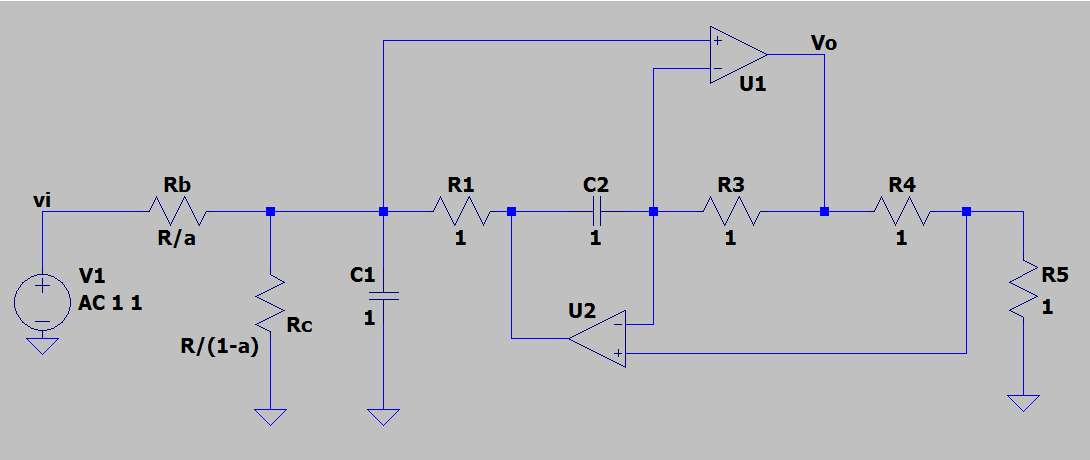


1- Para obtener la plantilla del pasabanda normalizada debemos dividir todo por f0 y con el dato del Q podemos sacar el ancho de banda ya que: 
\begin{equation}
Q = \frac{f_0}{\Delta f}
\end{equation}

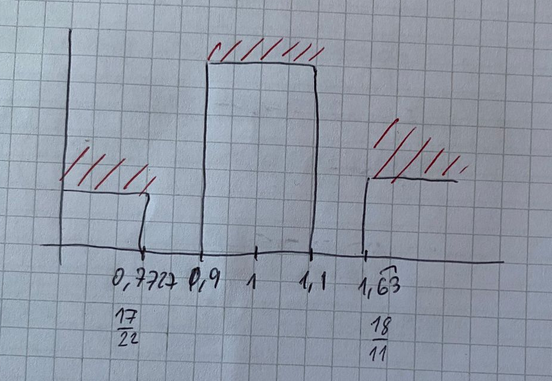

2- Para obtener la transferencia normalizada del prototipo pasabajo debemos aplicar la transformacion para obtener los nuevos ws para el filtro pasa bajo y asi sacar el epsilon y grado de nuestro pasa bajo 

\begin{equation}
\Omega_s=\frac{Q*(\omega_s² -1 )}{\omega_s}
\end{equation}

Quedandonos dos frecuencias de stop 

\begin{equation}
\Omega_{s1} = -2,6069, 
\Omega_{s2}=5,1262
\end{equation}


Ahora realizo los calculos de $$\epsilon$$ y de $$ n$$

In [2]:
import numpy as np
import math
from scipy import signal as sig
from pytc2.general import Chebyshev_polynomials,s,w,print_subtitle
from pytc2.sistemas_lineales import analyze_sys,pretty_print_lti, tf2sos_analog,pretty_print_SOS

# Importo lo que voy a usar mas tarde


#Declaro mis variables 
alfha_max=0.5
alfha_min_1=16
alfha_min_2=24

ws1=17000/22000
wp=1
ws2=36000/22000

Q=22000.0/(24200-19800)

ws_pb1= -(Q*( ws1**2 - 1))/ ws1
ws_pb2= (Q*( ws2**2 - 1))/ ws2

display(ws_pb1)
display(ws_pb2)

# Calculo de epsilon 

epsilon=np.sqrt((10**(alfha_max/10)-1))


alfha_aprox_1=0
alfha_aprox_2=0
n_1=1
n_2=1

while alfha_aprox_1 < alfha_min_1:
    alfha_aprox_1=10*np.log10(1+ epsilon**2 * (np.cosh(n_1 * (np.arccosh(ws_pb1))))**2)
    
    if alfha_aprox_1<alfha_min_1 :
        n_1 = n_1 + 1
    

while alfha_aprox_2<alfha_min_2 :
    alfha_aprox_2=10*np.log10(1+ epsilon**2 * (np.cosh(n_2 * (np.arccosh(ws_pb2))))**2)
    if alfha_aprox_2<alfha_min_1 :
        n_2=n_2 + 1

display(n_1)
display(n_2)

2.606951871657754

5.126262626262627

3

2

Tengo que hacer entonces un Cheby de orden 3 con $$ \alpha_{max}= 0,5$$

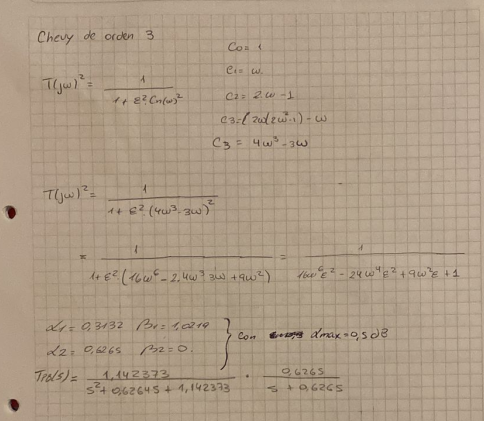

Una vez obtenida la transferencia del filtro pasa bajo, nos queda entonces aplicar el nucleo de transformacion y asi llegar a nuestra transferencia pasabanda:

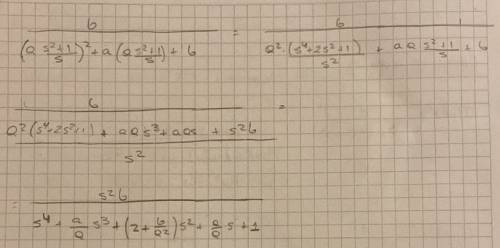
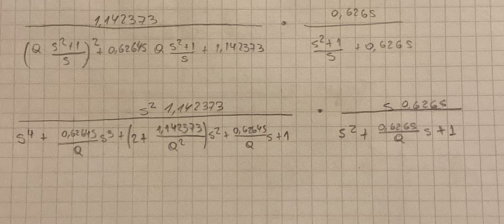


Nos quedo entonces la siguiente transferencia
\begin{equation}
T(S)=\frac{1,142373s²}{s⁴+\frac{0,6264}{Q}s³+(2+\frac{1,1423}{Q²})s² + \frac{0,6264}{Q}s+1}*\frac{0,6265s}{s²+\frac{0,6265}{Q}s+1}
\end{equation}



In [3]:
chebn_expr= Chebyshev_polynomials(n_1)
display(chebn_expr)

z,p,k=sig.cheb1ap(n_1,alfha_max)
num_cheb,den_cheb=sig.zpk2tf(z,p,k)

display(num_cheb)
display(den_cheb)

sos_cheb=tf2sos_analog(num_cheb,den_cheb)
pretty_print_SOS(sos_cheb,mode='omegayq')
num_pbanda, den_pbanda = sig.lp2bp(num_cheb, den_cheb, bw = 1/Q)
sos_band_pass=tf2sos_analog(num_pbanda,den_pbanda)
pretty_print_SOS(sos_band_pass,mode='omegayq')

w*(4*w**2 - 3)

array([0.71569379])

array([1.        , 1.25291297, 1.53489546, 0.71569379])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

3-Una vez obtenidas estructuras bicuadraticas para la implementacion del filtro utilizaremos la siguiente topologia

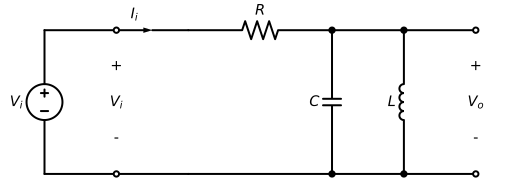

In [4]:
from schemdraw import Drawing
from pytc2.dibujar import dibujar_espacio_derivacion, dibujar_elemento_serie, dibujar_elemento_derivacion, dibujar_puerto_salida, dibujar_puerto_entrada
from pytc2.general import to_latex

d = Drawing(unit=4)
d = dibujar_elemento_derivacion(d, "V",  with_nodes=False, sym_label="V_i")
d = dibujar_espacio_derivacion(d)
d = dibujar_puerto_entrada(d, voltage_lbl=('+', to_latex('V_i'), '-'), current_lbl=to_latex('I_i'))
d = dibujar_elemento_serie(d, "R", sym_label="R")
d = dibujar_elemento_derivacion(d, "C", sym_label="C")
d = dibujar_espacio_derivacion(d)
d = dibujar_elemento_derivacion(d, "L", sym_label="L")
d = dibujar_puerto_salida(d, voltage_lbl=('+', to_latex('V_o'), '-'))
display(d)

La transferencia nos queda entonces: 
\begin{equation}
T(s)=\frac{s\frac{1}{RC}}{s²+ s\frac{1}{RC}+\frac{1}{LC}}
\end{equation}


Para la primera seccion tenemos $$Q_1 = 7,981$$  $$\omega_0 = 1 $$ $$ k_1=1,207$$

Elijo $$ L=1 $$ $$ C_1=1 $$ $$R_1=7,981$$  

Para la segunda seccion tenemos $$ Q_2=16,05$$ $$\omega_0 = 0,903 $$ $$ k_1=2,045$$

Elijo $$ L=1 $$ $$ C_1=1,2263 $$ $$R_1=14,494$$

Para la tercera seccion tenemos $$ Q_3=16,05$$ $$\omega_0 = 1,107 $$ $$ k_3=4,768$$

Elijo $$ L=1 $$ $$ C_1=0,8160 $$ $$R_1=17,76$$


Simulacion de circuito con estructuras pasivas y seguidores de tension:

### Circuito:
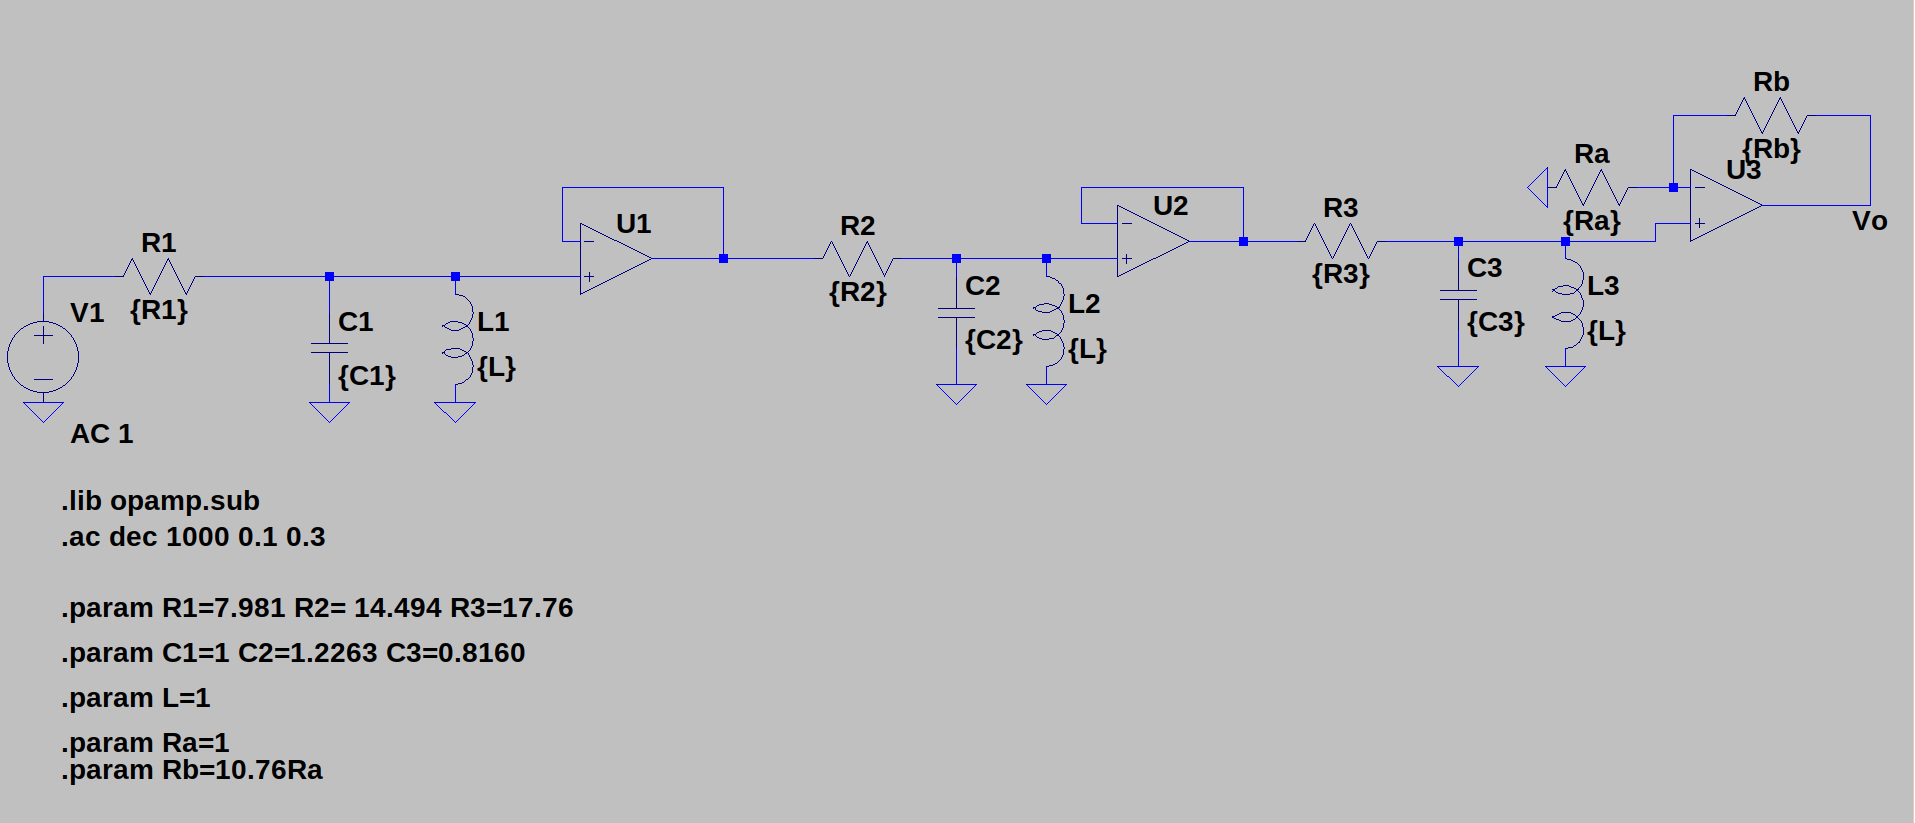

### AC Analisis



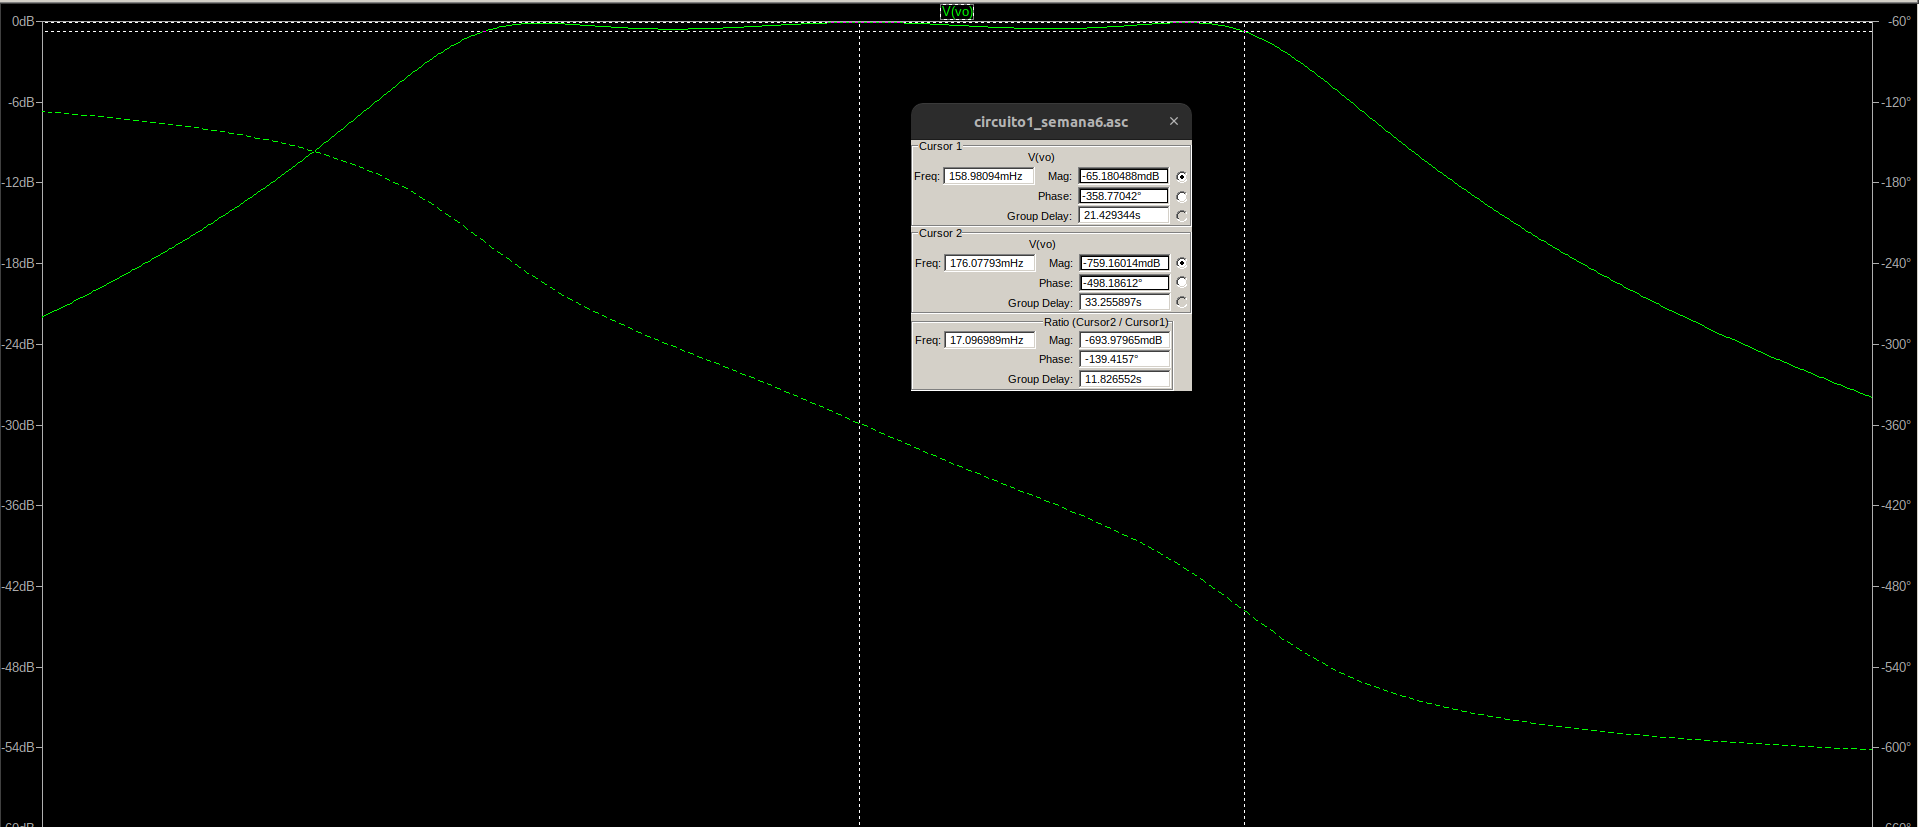

### Circuito con activacion de GIC y levantamiento de tierra
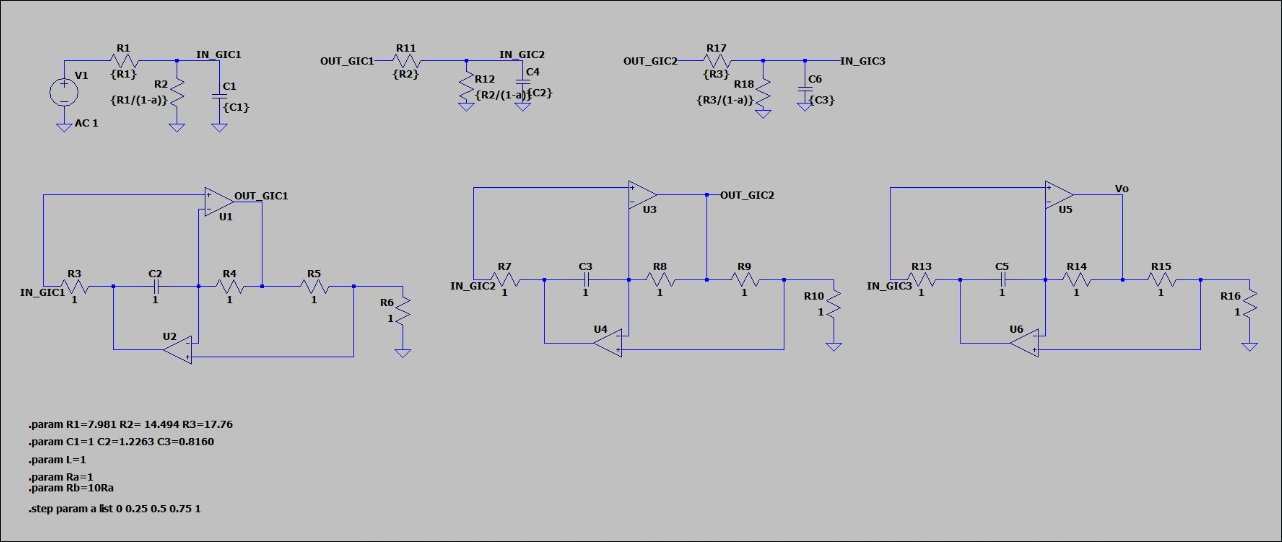


### AC Analisis
Estudio de modulo con diferentes valores de a para estudiar como afecta a la transferencia el levantamiento de tierra
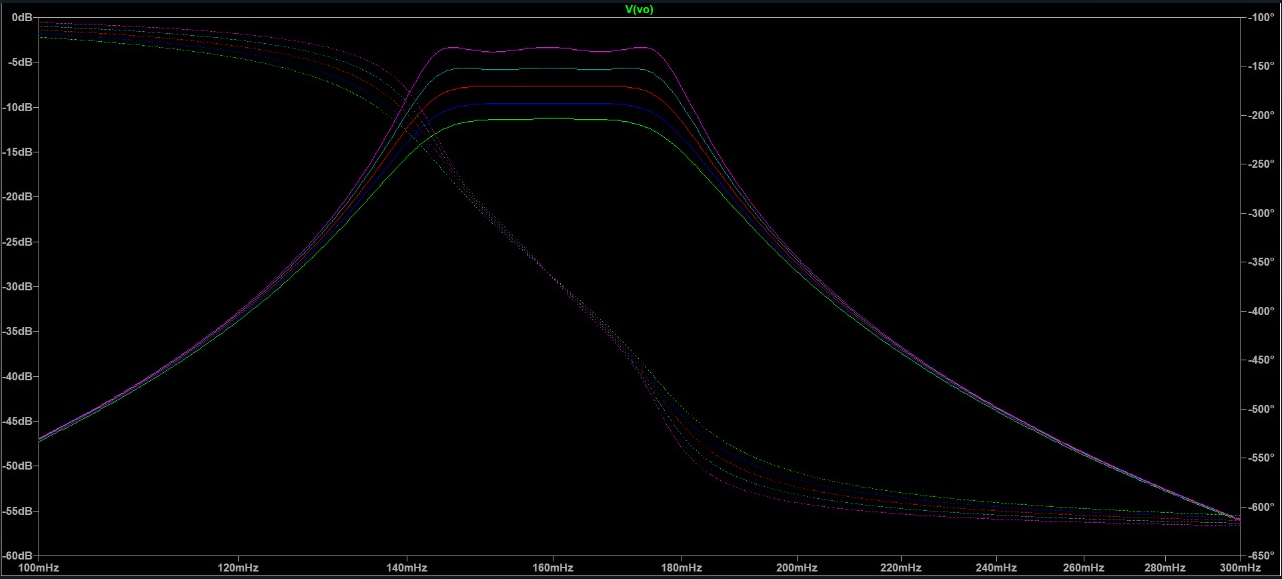


### Circuito y AC Analisis del circuito utilizando la ganancia del GIC para levantar la transferencia

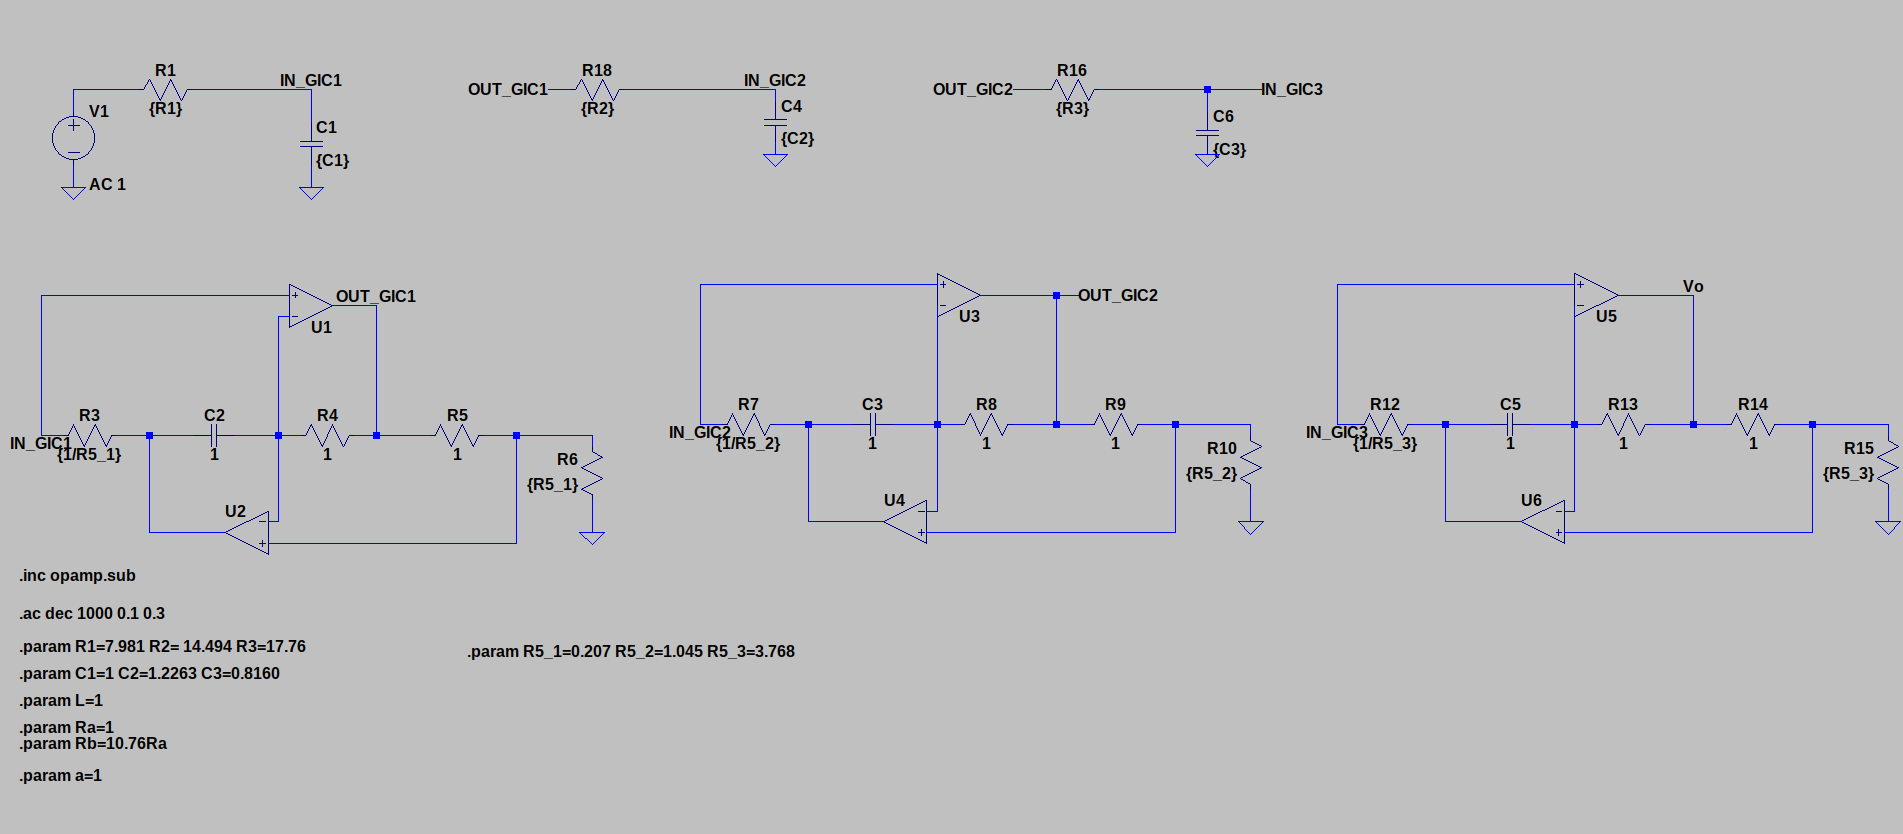
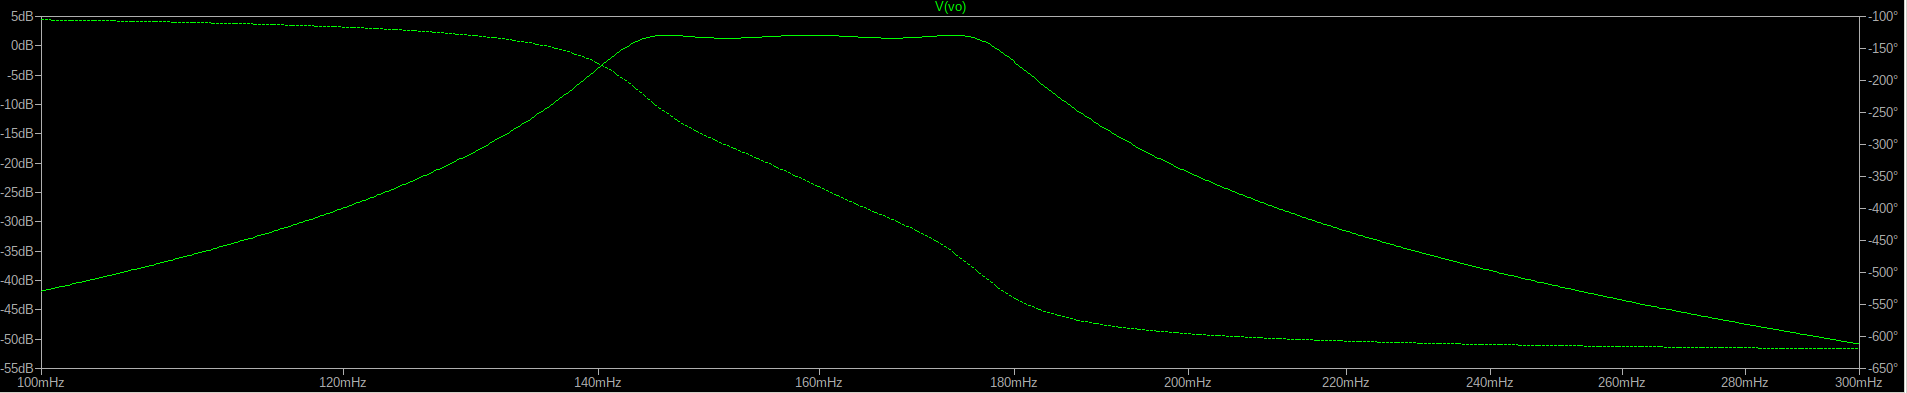



### Simulacion en Python: 

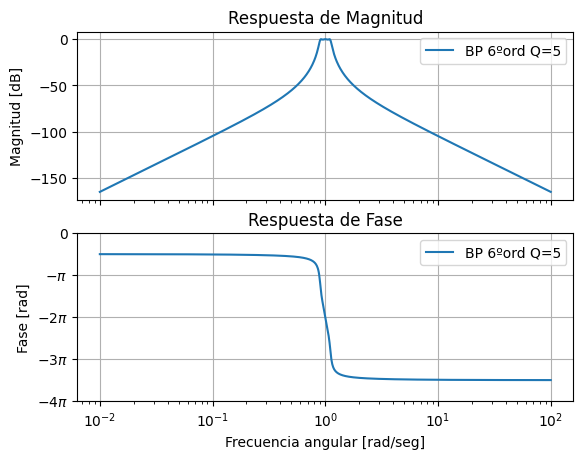

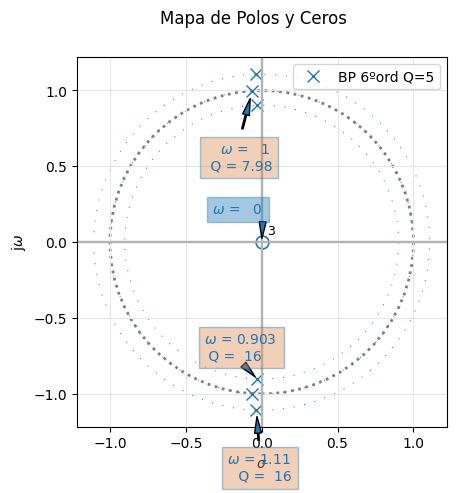

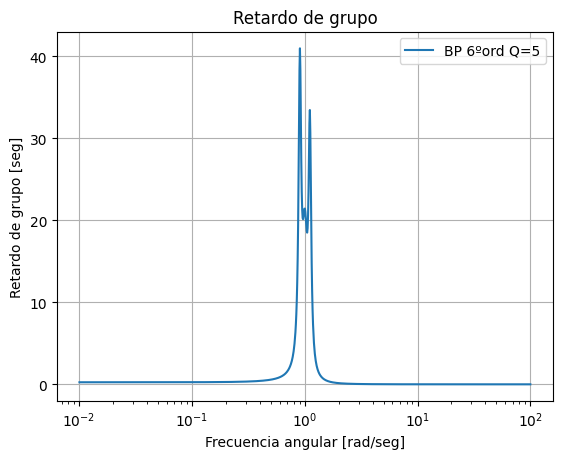

In [5]:
T1_bp =  sig.TransferFunction( num_pbanda, den_pbanda )

# el caracter "_" descarta la salida de la función
_= analyze_sys([T1_bp], sys_name='BP 6ºord Q=5'.format(Q))

## Conclusiones: 

Podemos ver que la implementacion con GIC nos da muy buenos resultados para realizar la transferencia, ya que no solo nos permite replicar el comportamiento de un inductor sino que tambien jugando con los valores de R5 y R4 podemos lograr ganancia. Con esto debemos tener cuidado porque al modificar R5 por ejemplo vamos a modificar el valor de L. Por eso yo lo que hice en esta ocasion fue dejar R4 fija y variar R5 y para compensar el valor de Leq lo que hice fue hacer $$R1=1/R5$$

Otra conclusion que podemos sacar es que como ws1*ws2 es distinto de 1 debemos evaluar cual de las dos cotas nos limita nuestro filtro mediante calculo ya que no siempre obedece a lo que uno espera. En este caso la frecuencia f1 era la que nos imponia un n=3 para cumplir con los requisitos del filtro propuesto. 